In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model,model_selection,metrics

In [5]:
df=pd.read_csv("Advertising.csv")
print("preview:")
print(df.head())

preview:
      tv  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   17.2   45.9       69.3    9.3
2  180.8   10.8       58.4   12.9
3   44.5   39.3       45.1   10.4
4  151.5   41.3       58.5   18.5


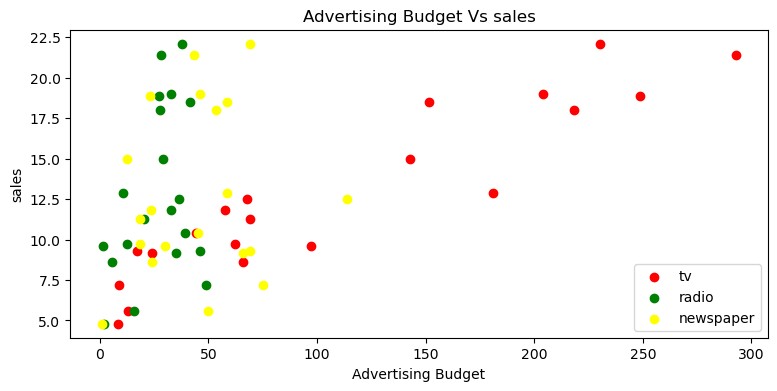

In [13]:
plt.figure(figsize=(9,4))
plt.scatter(df['tv'],df['sales'],color='red',label='tv')
plt.scatter(df['radio'],df['sales'],color='green',label='radio')
plt.scatter(df['newspaper'],df['sales'],color='yellow',label='newspaper')
plt.xlabel("Advertising Budget")
plt.ylabel("sales")
plt.legend()
plt.title("Advertising Budget Vs sales")
plt.show()

In [17]:
X = df[['tv', 'radio', 'newspaper']] 
y = df['sales'] 
# Splitting the data into training and testing sets 
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, 
random_state=42)

In [19]:
train = pd.DataFrame(X_train, columns=['tv', 'radio', 'newspaper']) 
train['sales'] = y_train.values 
print("Training dataset:") 
print(train.head()) 
test = pd.DataFrame(X_test, columns=['tv', 'radio', 'newspaper']) 
test['sales'] = y_test.values 
print("Testing dataset:") 
print(test.head())

Training dataset:
       tv  radio  newspaper  sales
11   67.8   36.6      114.0   12.5
3    44.5   39.3       45.1   10.4
18  292.9   28.3       43.2   21.4
16  142.9   29.3       12.6   15.0
13  218.4   27.7       53.4   18.0
Testing dataset:
       tv  radio  newspaper  sales
0   230.1   37.8       69.2   22.1
17  248.8   27.1       22.9   18.9
15   62.3   12.6       18.3    9.7
1    17.2   45.9       69.3    9.3
8    66.1    5.8       24.2    8.6


In [21]:
# Creating and training the model 
mlr = linear_model.LinearRegression() 
mlr.fit(X_train, y_train) 
# Predicting the test set results 
y_predict = mlr.predict(X_test) 
# Creating a DataFrame to compare actual and predicted sales 
dfd = pd.DataFrame({'Actual Sales': y_test, 'Predicted Sales': y_predict}) 
print(dfd.head())

    Actual Sales  Predicted Sales
0           22.1        20.245278
17          18.9        19.981679
15           9.7         8.741592
1            9.3        11.152353
8            8.6         7.819358


In [23]:
accuracy = mlr.score(X_test, y_test) 
mae = metrics.mean_absolute_error(y_test, y_predict) 
mse = metrics.mean_squared_error(y_test, y_predict) 
rmse = math.sqrt(mse) 
print(f"Model Accuracy: {accuracy * 100:.2f}%") 
print(f"Mean Absolute Error: {mae}") 
print(f"Mean Squared Error: {mse}") 
print(f"Root Mean Squared Error: {rmse}") 

Model Accuracy: 87.08%
Mean Absolute Error: 1.7450929652237577
Mean Squared Error: 4.185747733199326
Root Mean Squared Error: 2.0459100012462246


In [25]:
# Predicting sales based on user input 
tv_input = float(input("Enter TV advertising budget: ")) 
radio_input = float(input("Enter Radio advertising budget: ")) 
newspaper_input = float(input("Enter Newspaper advertising budget: ")) 
new_data = pd.DataFrame({'tv': [tv_input], 'radio': [radio_input], 'newspaper': 
[newspaper_input]}) 
predicted_sales = mlr.predict(new_data) 
print(f"Predicted Sales: {predicted_sales[0]}") 


Enter TV advertising budget:  1000
Enter Radio advertising budget:  500
Enter Newspaper advertising budget:  100


Predicted Sales: 128.430482209796


Sales = 0.04855890035884533*TV + 0.15386300153529342*Radio + -0.010252352422612465*Newspaper + 3.9653163255651904


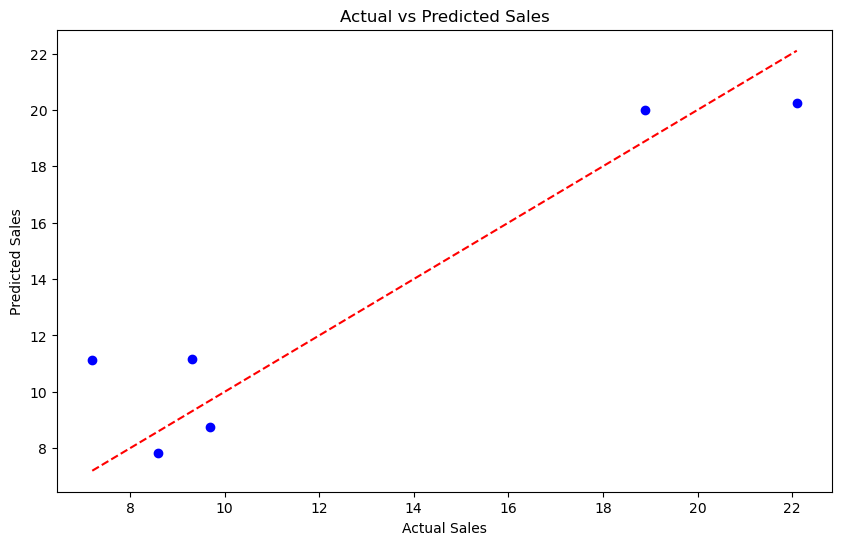

In [31]:
# Displaying the regression equation 
coefficients = mlr.coef_ 
intercept = mlr.intercept_ 
print(f"Sales = {coefficients[0]}*TV + {coefficients[1]}*Radio + {coefficients[2]}*Newspaper + {intercept}") 
# Plotting Actual vs Predicted Sales 
plt.figure(figsize=(10, 6)) 
plt.scatter(y_test, y_predict, color='blue') 
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.xlabel('Actual Sales') 
plt.ylabel('Predicted Sales') 
plt.title('Actual vs Predicted Sales') 
plt.show() 